<a href="https://colab.research.google.com/github/JamalMorales/Artificial-intelligence/blob/main/Assignments/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF2_Data_Processing

**Members of the team:**

1. Jamal Morales Sanchez 2064497 N2
2. Gabriela Mariana Rangel Carrillo 2006071 N2
3. Evelyn Rubí Martínez Ruiz 2071292 N2
4. Carlos Ernesto Martinez 1975221 N2
5. Abigail Montserrat Nieto Solis 2059067 N2

# **Part 1 Data Loading and Exploration**

The first step is to import the necessary libraries and load the dataset for analysis.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/JamalMorales/Artificial-intelligence/main/data.csv"
df = pd.read_csv(url)

Then we display the first five rows to preview the structure and contents of the dataset

In [41]:
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


We check for missing values in each column to ensure data completeness

In [42]:

print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Next, we identify each zero in every column excluding the outcome column. After this, we make a print to show how many zeros where found in every column analyzed and we mande the print fot later comparisons

In [43]:

cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"{col} - valores cero: {(df[col] == 0).sum()}")

print(df.describe())

Glucose - valores cero: 5
BloodPressure - valores cero: 35
SkinThickness - valores cero: 227
Insulin - valores cero: 374
BMI - valores cero: 11
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578              

# **Part 2 Data Cleaning and Normalization**

Then we made a function that allows us to replace the zeros with the median data from each column in order to clean the data.

In [44]:
def zless(col):
    median = col[col != 0].median()
    return col.replace(0, median)
    print(df.describe())

We decided to make a object to copy the original dataframe before applying the previous function. This allows us to make easier comparisons between different graphs later.

In [45]:
zlessdf = df.copy()
zlessresult = zlessdf.apply(lambda col: zless(col) if col.name in cols_to_check else col)

Then we normalize the data through the min max method while keeping the outcome column unchanged.

In [51]:
scaled = zlessresult.copy()
for column in scaled.columns:
    if column != 'Outcome':  # No normalizar la variable objetivo
        scaled[column] = (scaled[column] - scaled[column].min()) / (scaled[column].max() - scaled[column].min())

# **Part 3 Data Visualization**

Now we need plot a histogram of glucose levels before normalization to visualize the original distribution and afther that we plot the histogram again after normalization, showing the same shape but on a 0 - 1 scale

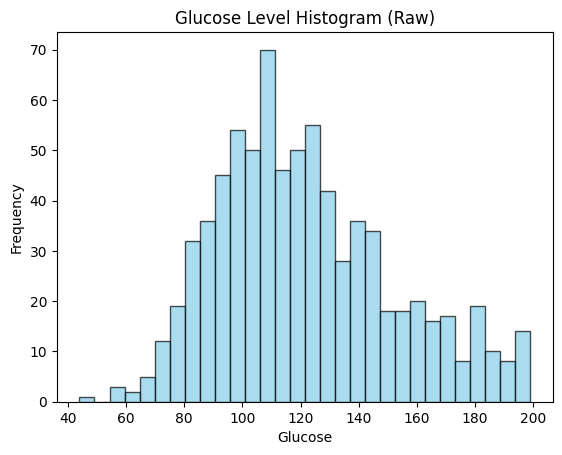

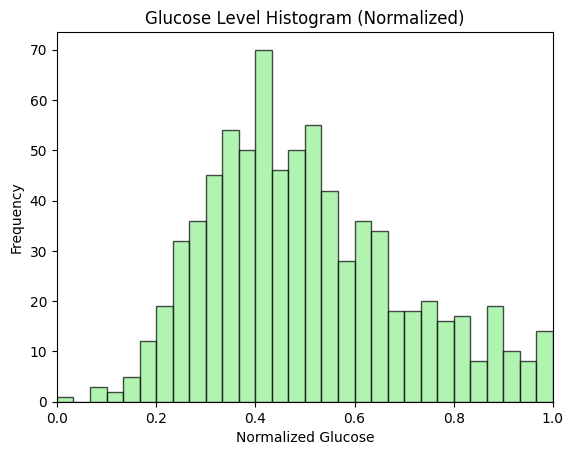

In [52]:
# Pre normalized glucose histogram
plt.hist(zlessresult['Glucose'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Glucose Level Histogram (Raw)")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.ylim(bottom=0)
plt.show()

# Post normalized glucose histogram
plt.hist(scaled['Glucose'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title("Glucose Level Histogram (Normalized)")
plt.xlabel("Normalized Glucose")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()



We create a boxplot of blood pressure values to detect outliers

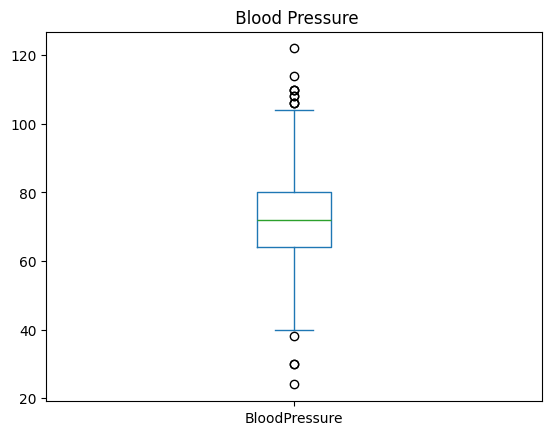

In [48]:
# Blood pressure boxplot
bloodpressure_boxplot = zlessresult['BloodPressure']
bloodpressure_boxplot.plot(kind='box', title = ' Blood Pressure')
plt.show()

We plot a scatter plot to explore the relationship between glucose and BMI

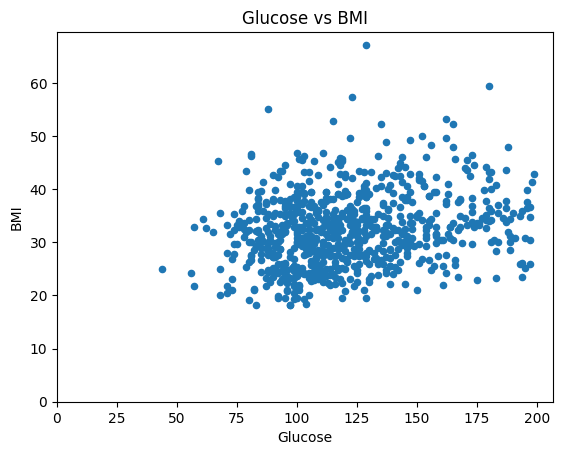

In [49]:
# Glucose x BMI scatter plot
zlessresult.plot(kind='scatter', x='Glucose', y='BMI', title='Glucose vs BMI')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

We create a bar chart showing the number of patients with and without diabetes

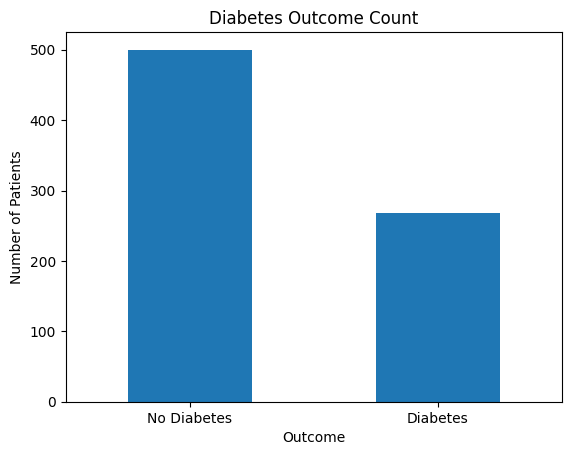

In [50]:
# Comparative bar chart for diabetic and non diabetic patients
df['Outcome'].value_counts().plot(kind='bar', title='Diabetes Outcome Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.ylabel('Number of Patients')
plt.show()